# NFL Data Exploration with nfl_data_py

In this notebook, we pull weekly NFL player statistics from the [nfl_data_py](https://github.com/nflverse/nfl_data_py) dataset and begin exploring the structure of the data.

In [49]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nfl_data_py as nfl

In [50]:
# Load player stats data (2024 season data)
df = nfl.import_weekly_data([2024])

Downcasting floats.


In [51]:
# Check data columns
df.columns.tolist()

['player_id',
 'player_name',
 'player_display_name',
 'position',
 'position_group',
 'headshot_url',
 'recent_team',
 'season',
 'week',
 'season_type',
 'opponent_team',
 'completions',
 'attempts',
 'passing_yards',
 'passing_tds',
 'interceptions',
 'sacks',
 'sack_yards',
 'sack_fumbles',
 'sack_fumbles_lost',
 'passing_air_yards',
 'passing_yards_after_catch',
 'passing_first_downs',
 'passing_epa',
 'passing_2pt_conversions',
 'pacr',
 'dakota',
 'carries',
 'rushing_yards',
 'rushing_tds',
 'rushing_fumbles',
 'rushing_fumbles_lost',
 'rushing_first_downs',
 'rushing_epa',
 'rushing_2pt_conversions',
 'receptions',
 'targets',
 'receiving_yards',
 'receiving_tds',
 'receiving_fumbles',
 'receiving_fumbles_lost',
 'receiving_air_yards',
 'receiving_yards_after_catch',
 'receiving_first_downs',
 'receiving_epa',
 'receiving_2pt_conversions',
 'racr',
 'target_share',
 'air_yards_share',
 'wopr',
 'special_teams_tds',
 'fantasy_points',
 'fantasy_points_ppr']

In [52]:
# Print QB stats
qb_stats = (
    df[df['position'] == 'QB']
    .groupby('player_name')[['passing_yards', 'passing_tds', 'rushing_yards', 'rushing_tds']]
    .sum()
    .sort_values(by='passing_yards', ascending=False)
    .reset_index()
)

print(qb_stats.head(32))

     player_name  passing_yards  passing_tds  rushing_yards  rushing_tds
0         J.Goff         4942.0           38           63.0            0
1       J.Burrow         4918.0           43          201.0            2
2     B.Mayfield         4685.0           43          401.0            3
3      P.Mahomes         4607.0           31          389.0            4
4      L.Jackson         4601.0           45         1035.0            4
5      S.Darnold         4564.0           36          231.0            1
6      J.Daniels         4390.0           30         1026.0            7
7        J.Allen         4367.0           32          636.0           14
8        G.Smith         4320.0           21          272.0            2
9     M.Stafford         4295.0           24           45.0            0
10      C.Stroud         4254.0           21          317.0            0
11     J.Herbert         4112.0           24          306.0            2
12         B.Nix         3919.0           30       

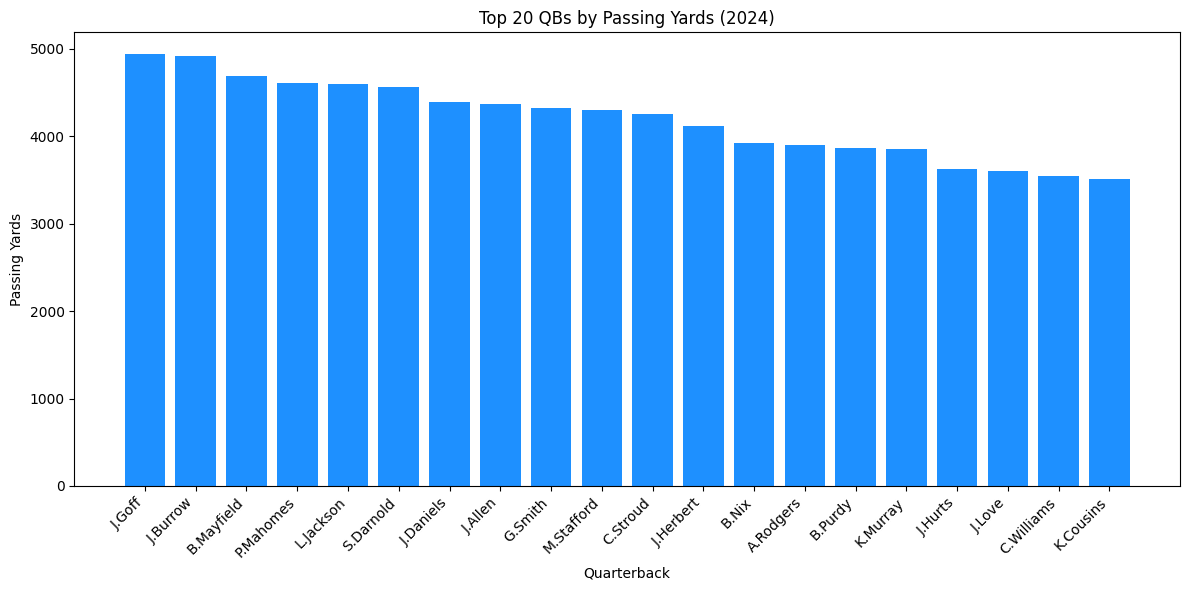

In [53]:
# QB Chart - Top 20 QBs by Passing Yards
plt.figure(figsize=(12, 6))
top_qbs = qb_stats.head(20)
plt.bar(top_qbs['player_name'], top_qbs['passing_yards'], color='dodgerblue')
plt.xticks(rotation=45, ha='right')
plt.title("Top 20 QBs by Passing Yards (2024)")
plt.xlabel("Quarterback")
plt.ylabel("Passing Yards")
plt.tight_layout()
plt.show()

In [54]:
# Print RB stats
rb_stats = (
    df[df['position'] == 'RB']
    .groupby('player_name')[['rushing_yards', 'rushing_tds', 'receiving_yards', 'receiving_tds']]
    .sum()
    .sort_values(by='rushing_yards', ascending=False)
    .reset_index()
)

print(rb_stats.head(50))

     player_name  rushing_yards  rushing_tds  receiving_yards  receiving_tds
0      S.Barkley         2504.0           18            353.0              2
1     B.Robinson         2384.0           24            612.0              1
2        D.Henry         2191.0           19            193.0              2
3        J.Gibbs         1517.0           18            567.0              3
4     K.Williams         1481.0           14            197.0              3
5       J.Taylor         1475.0           11            136.0              1
6       J.Jacobs         1410.0           16            382.0              1
7         J.Cook         1281.0           19            322.0              2
8        J.Mixon         1210.0           13            334.0              1
9       B.Irving         1199.0            8            398.0              1
10     C.Hubbard         1195.0           10            171.0              1
11       A.Jones         1186.0            5            420.0              2

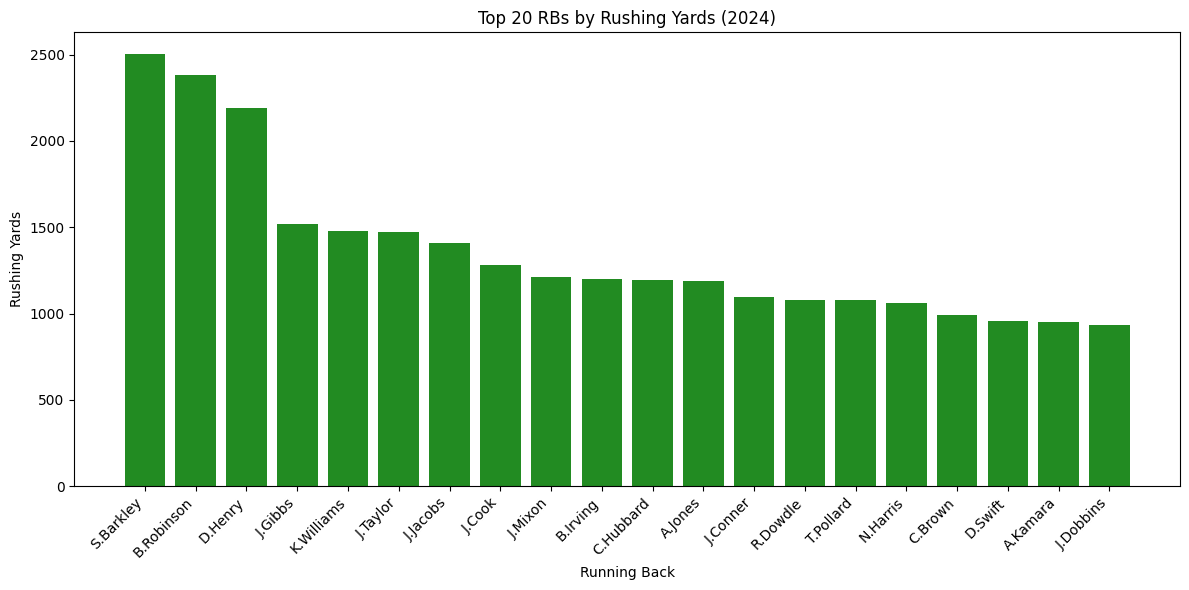

In [55]:
# RB Chart - Top 20 RBs by Rushing Yards
plt.figure(figsize=(12, 6))
top_rbs = rb_stats.head(20)
plt.bar(top_rbs['player_name'], top_rbs['rushing_yards'], color='forestgreen')
plt.xticks(rotation=45, ha='right')
plt.title("Top 20 RBs by Rushing Yards (2024)")
plt.xlabel("Running Back")
plt.ylabel("Rushing Yards")
plt.tight_layout()
plt.show()

In [56]:
# Print WR stats
wr_stats = (
    df[df['position'] == 'WR']
    .groupby('player_name')[['receiving_yards', 'receiving_tds']]
    .sum()
    .sort_values(by='receiving_yards', ascending=False)
    .reset_index()
)

print(wr_stats.head(50))

       player_name  receiving_yards  receiving_tds
0          J.Chase           1708.0             17
1      J.Jefferson           1591.0             10
2      A.St. Brown           1400.0             12
3       L.McConkey           1346.0              8
4       T.McLaurin           1323.0             16
5          D.Moore           1317.0              9
6         B.Thomas           1282.0             10
7         D.London           1271.0              9
8          A.Brown           1242.0              9
9          J.Jeudy           1229.0              4
10       N.Collins           1209.0              8
11        M.Nabers           1204.0              7
12          C.Lamb           1194.0              6
13        C.Sutton           1156.0              8
14         P.Nacua           1131.0              3
15  J.Smith-Njigba           1130.0              6
16        G.Wilson           1104.0              7
17         M.Evans           1096.0             12
18         D.Adams           10

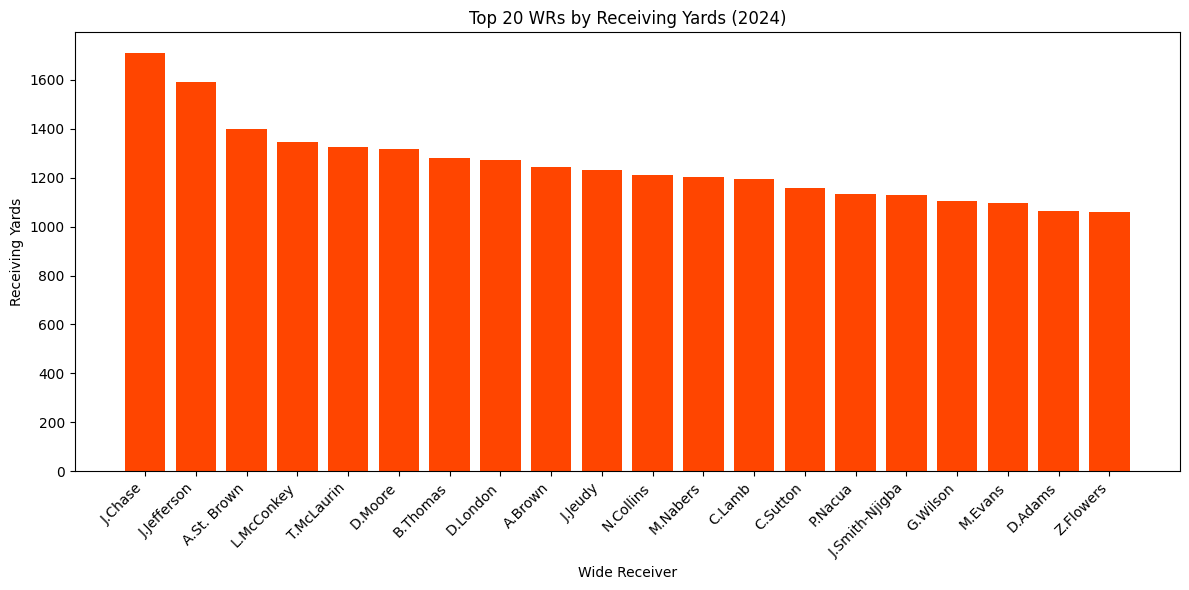

In [57]:
# WR Chart - Top 20 WRs by Receiving Yards
plt.figure(figsize=(12, 6))
top_wrs = wr_stats.head(20)
plt.bar(top_wrs['player_name'], top_wrs['receiving_yards'], color='orangered')
plt.xticks(rotation=45, ha='right')
plt.title("Top 20 WRs by Receiving Yards (2024)")
plt.xlabel("Wide Receiver")
plt.ylabel("Receiving Yards")
plt.tight_layout()
plt.show()

In [58]:
# Print QB Fantasy Rankings (PPR)
qb_fantasy_rank = (
    df[df['position'] == 'QB']
    .groupby('player_name')[['fantasy_points_ppr', 'passing_yards', 'passing_tds', 'rushing_yards', 'rushing_tds']]
    .sum()
    .sort_values(by='fantasy_points_ppr', ascending=False)
    .reset_index()
)

print(qb_fantasy_rank.head(32))

     player_name  fantasy_points_ppr  passing_yards  passing_tds  \
0      L.Jackson          471.539978         4601.0           45   
1        J.Allen          438.279999         4367.0           32   
2      J.Daniels          428.199982         4390.0           30   
3        J.Hurts          411.559998         3629.0           23   
4     B.Mayfield          381.500000         4685.0           43   
5       J.Burrow          372.820007         4918.0           43   
6      P.Mahomes          348.380005         4607.0           31   
7         J.Goff          333.679993         4942.0           38   
8          B.Nix          331.260010         3919.0           30   
9      S.Darnold          319.660004         4564.0           36   
10      K.Murray          297.239990         3851.0           21   
11     J.Herbert          291.080017         4112.0           24   
12       B.Purdy          266.860016         3864.0           20   
13       G.Smith          266.000000         432

In [59]:
# Print WR Fantasy Rankings (PPR)
wr_fantasy_rank = (
    df[df['position'] == 'WR']
    .groupby('player_name')[['fantasy_points_ppr', 'receiving_yards', 'receiving_tds']]
    .sum()
    .sort_values(by='receiving_yards', ascending=False)
    .reset_index()
)

print(wr_fantasy_rank.head(50))

       player_name  fantasy_points_ppr  receiving_yards  receiving_tds
0          J.Chase          403.000000           1708.0             17
1      J.Jefferson          328.279999           1591.0             10
2      A.St. Brown          337.880005           1400.0             12
3       L.McConkey          275.600006           1346.0              8
4       T.McLaurin          322.500000           1323.0             16
5          D.Moore          323.200012           1317.0              9
6         B.Thomas          284.000000           1282.0             10
7         D.London          280.799988           1271.0              9
8          A.Brown          257.200012           1242.0              9
9          J.Jeudy          240.899994           1229.0              4
10       N.Collins          248.900009           1209.0              8
11        M.Nabers          273.600006           1204.0              7
12          C.Lamb          263.399994           1194.0              6
13    

In [ ]:
# Print RB Fantasy Rankings (PPR)
rb_fantasy_rank = (
    df[df['position'] == 'RB']
    .groupby('player_name')[['fantasy_points_ppr', 'rushing_yards', 'rushing_tds', 'receiving_yards', 'receiving_tds']]
    .sum()
    .sort_values(by='rushing_yards', ascending=False)
    .reset_index()
)

print(rb_fantasy_rank.head(50))

     player_name  fantasy_points_ppr  rushing_yards  rushing_tds  \
0      S.Barkley          455.700012         2504.0           18   
1     B.Robinson          532.599976         2384.0           24   
2        D.Henry          381.399994         2191.0           19   
3        J.Gibbs          390.399994         1517.0           18   
4     K.Williams          299.799988         1481.0           14   
5       J.Taylor          253.100006         1475.0           11   
6       J.Jacobs          314.200012         1410.0           16   
7         J.Cook          324.299988         1281.0           19   
8        J.Mixon          275.399994         1210.0           13   
9       B.Irving          260.700012         1199.0            8   
10     C.Hubbard          241.600006         1195.0           10   
11       A.Jones          250.600006         1186.0            5   
12      J.Conner          253.800003         1094.0            8   
13      R.Dowdle          197.800003         107